In [2]:
from cryoS2Sdrop.analyze import *
from cryoS2Sdrop.deconvolution import tom_deconv_tomo

deconv_kwargs = {
    "angpix": 10,
    "defocus": 0,
    "snrfalloff": 0.3,
    "deconvstrength": 1,
    "highpassnyquist": 0.02,
}

PARENT_PATH = setup.PARENT_PATH

pd.options.display.float_format = "{:,.6f}".format
pd.set_option('display.max_columns', 50)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model 4

In [20]:
tomo_list = ['shrec2021_model4_dummy']

data_log = []

for tomo in tomo_list:
    logdir = 'data/S2SDenoising/model_logs/%s/realBernoulli_convolved_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True, ignore_deconv=False)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log

model    version            dataset TV_alpha  \
0  realBernoulli_convolved_comparison  version_0  singleCET_dataset        0   
1  realBernoulli_convolved_comparison  version_1  singleCET_dataset        0   
3  realBernoulli_convolved_comparison  version_2  singleCET_dataset        0   
2  realBernoulli_convolved_comparison  version_3  singleCET_dataset        0   

         Version_comment     transform  full_tomo_psnr  full_tomo_ssim  \
0              Bernoulli  {'p': '0.5'}        6.016479       -0.039001   
1  Deconvolved Bernoulli  {'p': '0.5'}        5.192185       -0.056545   
3              Bernoulli  {'p': '0.5'}        5.751411       -0.047679   
2  Deconvolved Bernoulli  {'p': '0.5'}        4.963487       -0.059713   

   baseline_psnr  baseline_ssim  \
0       5.503306      -0.038987   
1       5.213845      -0.053055   
3       5.503306      -0.038987   
2       5.213845      -0.053055   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.3  5.716530 -0.037105   
1             null            true  0.3  4.858604 -0.042476   
3             null           false  0.7  5.716530 -0.037105   
2             null            true  0.7  4.858604 -0.042476   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            5.503306           -0.038987          0.034781   
1            5.503306           -0.038987         45.033288   
3            5.503306           -0.038987         22.293346   
2            5.503306           -0.038987         53.159546   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline noise_level  \
0             -4.828497          9.324806              3.874470       other   
1              8.947729         -5.653347            -11.714811       other   
3             -4.828497          4.508282              3.874470       other   
2              8.947729         -9.808998            -11.714811       other   

                tomo_name                                          pred_path  
0  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

index                               model    version            dataset  \
0      0  realBernoulli_convolved_comparison  version_0  singleCET_dataset   
1      1  realBernoulli_convolved_comparison  version_1  singleCET_dataset   
2      3  realBernoulli_convolved_comparison  version_2  singleCET_dataset   
3      2  realBernoulli_convolved_comparison  version_3  singleCET_dataset   

  TV_alpha        Version_comment     transform  full_tomo_psnr  \
0        0              Bernoulli  {'p': '0.5'}        6.016479   
1        0  Deconvolved Bernoulli  {'p': '0.5'}        5.192185   
2        0              Bernoulli  {'p': '0.5'}        5.751411   
3        0  Deconvolved Bernoulli  {'p': '0.5'}        4.963487   

   full_tomo_ssim  baseline_psnr  baseline_ssim  \
0       -0.039001       5.503306      -0.038987   
1       -0.056545       5.213845      -0.053055   
2       -0.047679       5.503306      -0.038987   
3       -0.059713       5.213845      -0.053055   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.3  5.716530 -0.037105   
1             null            true  0.3  4.858604 -0.042476   
2             null           false  0.7  5.716530 -0.037105   
3             null            true  0.7  4.858604 -0.042476   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            5.503306           -0.038987          0.034781   
1            5.503306           -0.038987         45.033288   
2            5.503306           -0.038987         22.293346   
3            5.503306           -0.038987         53.159546   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline noise_level  \
0             -4.828497          9.324806              3.874470       other   
1              8.947729         -5.653347            -11.714811       other   
2             -4.828497          4.508282              3.874470       other   
3              8.947729         -9.808998            -11.714811       other   

                tomo_name                                          pred_path  
0  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  shrec2021_model4_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

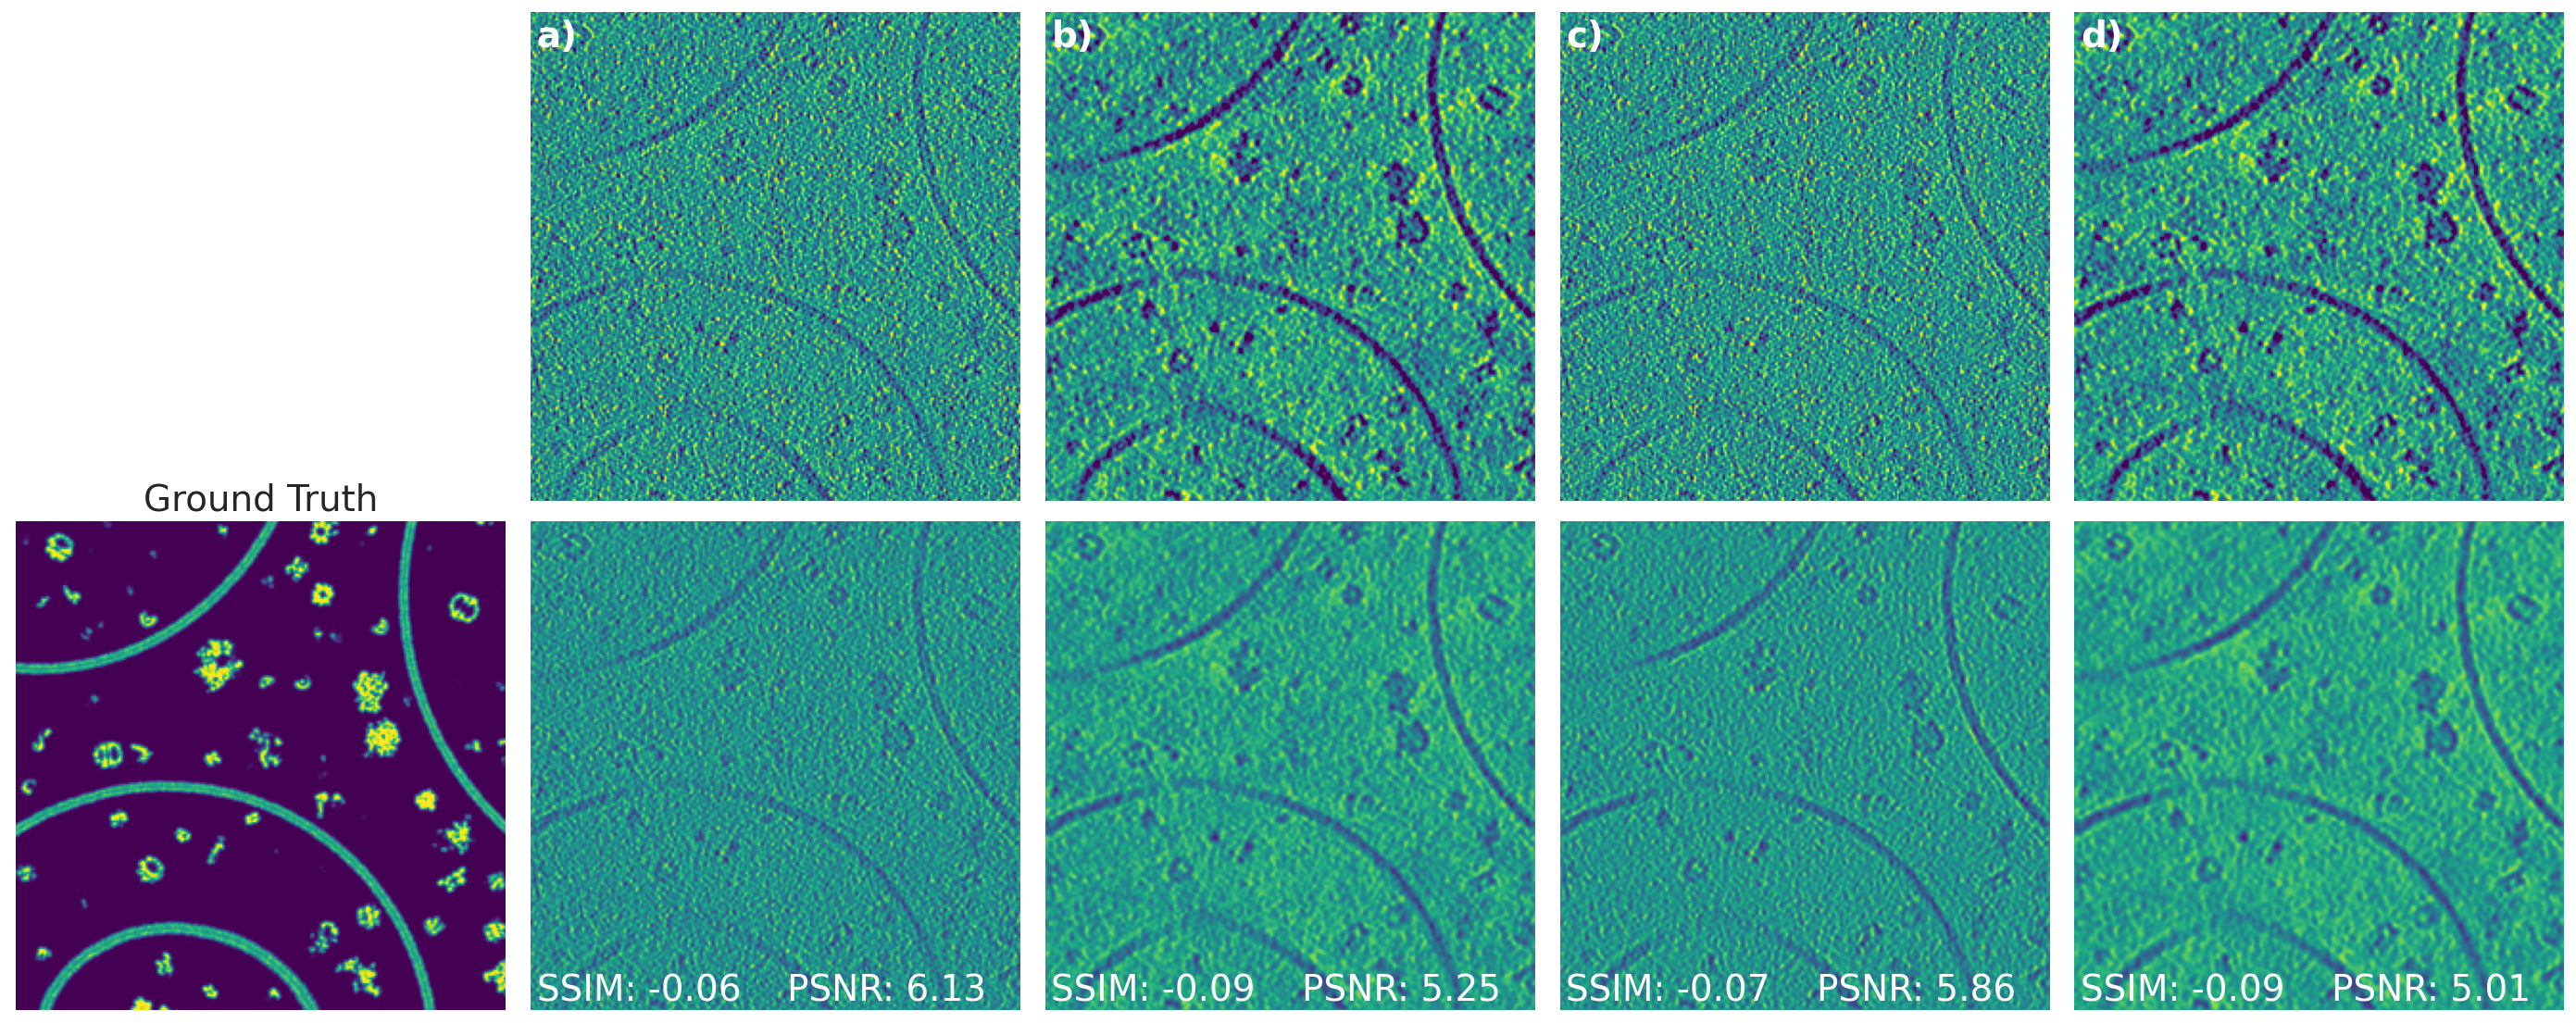

In [24]:
idx = data_log.groupby(['use_deconv_data', 'p'])['full_tomo_ssim'].transform(max) == data_log['full_tomo_ssim']

df = data_log[idx].reset_index()

display(df)

fig, ax = plt.subplots(2, len(df)+1, figsize=(20, 8), dpi=140)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    if row.use_deconv_data=="true":
        noisy = tom_deconv_tomo(**{"vol": noisy, **deconv_kwargs})
    
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[1][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[1][0].set_title('Ground Truth', size=20)
    ax_noisy = ax[0][i+1]
    ax_denoised = ax[1][i+1]
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')

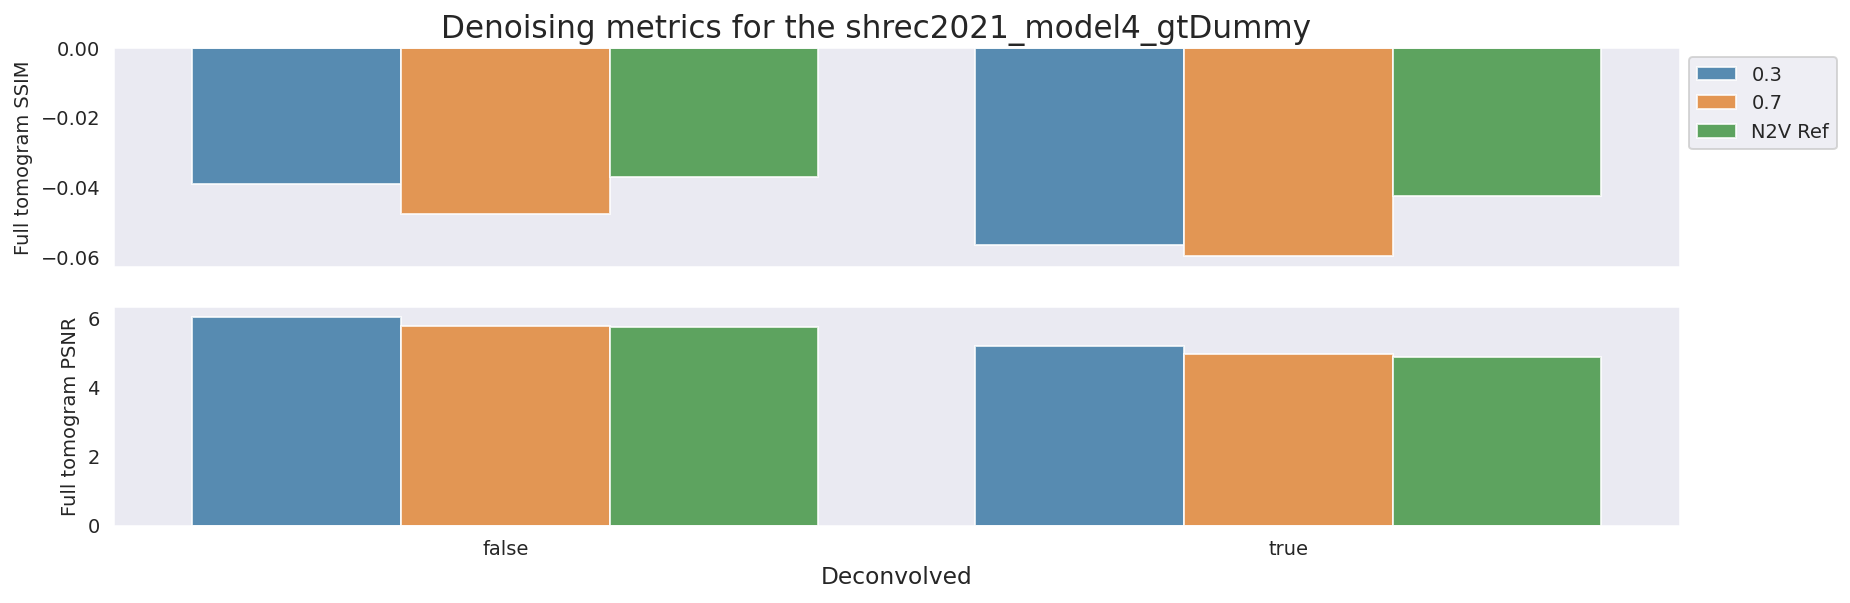

In [27]:
df = data_log.groupby(['use_deconv_data', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['use_deconv_data'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['use_deconv_data', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['use_deconv_data', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, dpi=140)

plt.tight_layout()
name = data_log.gt_tomo_path.unique()[0].split('/')[-1].replace('.mrc', '')

if name == 'tomoPhantom_model14':
    name = '"cell" model'
if name == 'tomoPhantom_model16':
    name = '"spaceship" model'
if name == 'tomoPhantom_model8':
    name = '"blobs" model'
    
plt.suptitle('Denoising metrics for the %s' %name, y=1.01)

sns.barplot(data=df, hue='p', y='full_tomo_ssim', x='use_deconv_data', ax=ax0, alpha=0.8)
ax0.set_xlabel('')
sns.barplot(data=df, hue='p', y='full_tomo_psnr', x='use_deconv_data', ax=ax1, alpha=0.8)
ax1.set_xlabel('Deconvolved')

ax0.set_ylabel('Full tomogram SSIM', fontsize=10)
ax1.set_ylabel('Full tomogram PSNR', fontsize=10)
ax0.legend(bbox_to_anchor=(1, 1))
ax1.get_legend().remove()

# Model 2

In [3]:
tomo_list = ['shrec2021_model2_dummy']

data_log = []

for tomo in tomo_list:
    logdir = 'data/S2SDenoising/model_logs/%s/realBernoulli_convolved_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True, ignore_deconv=False)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log

model    version            dataset TV_alpha  \
0  realBernoulli_convolved_comparison  version_0  singleCET_dataset        0   
1  realBernoulli_convolved_comparison  version_1  singleCET_dataset        0   
3  realBernoulli_convolved_comparison  version_2  singleCET_dataset        0   
2  realBernoulli_convolved_comparison  version_3  singleCET_dataset        0   

         Version_comment     transform  full_tomo_psnr  full_tomo_ssim  \
0              Bernoulli  {'p': '0.5'}        5.836009       -0.026475   
1  Deconvolved Bernoulli  {'p': '0.5'}        5.132121       -0.024892   
3              Bernoulli  {'p': '0.5'}        4.996282       -0.024221   
2  Deconvolved Bernoulli  {'p': '0.5'}        5.111185       -0.022567   

   baseline_psnr  baseline_ssim  \
0       5.453989      -0.028081   
1       5.384302      -0.024586   
3       5.453989      -0.028081   
2       5.384302      -0.024586   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.3  5.682079 -0.031841   
1             null            true  0.3  5.681387 -0.028839   
3             null           false  0.7  5.682079 -0.031841   
2             null            true  0.7  5.681387 -0.028839   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            5.453989           -0.024586          7.684182   
1            5.453989           -0.024586          1.246379   
3            5.453989           -0.024586         -1.485251   
2            5.453989           -0.024586         -8.212254   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline noise_level  \
0             29.508153          7.004424              4.182091       other   
1             17.297071         -5.901506              4.169396       other   
3             29.508153         -8.392151              4.182091       other   
2             17.297071         -6.285372              4.169396       other   

                tomo_name                                          pred_path  
0  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

index                               model    version            dataset  \
0      0  realBernoulli_convolved_comparison  version_0  singleCET_dataset   
1      1  realBernoulli_convolved_comparison  version_1  singleCET_dataset   
2      3  realBernoulli_convolved_comparison  version_2  singleCET_dataset   
3      2  realBernoulli_convolved_comparison  version_3  singleCET_dataset   

  TV_alpha        Version_comment     transform  full_tomo_psnr  \
0        0              Bernoulli  {'p': '0.5'}        5.836009   
1        0  Deconvolved Bernoulli  {'p': '0.5'}        5.132121   
2        0              Bernoulli  {'p': '0.5'}        4.996282   
3        0  Deconvolved Bernoulli  {'p': '0.5'}        5.111185   

   full_tomo_ssim  baseline_psnr  baseline_ssim  \
0       -0.026475       5.453989      -0.028081   
1       -0.024892       5.384302      -0.024586   
2       -0.024221       5.453989      -0.028081   
3       -0.022567       5.384302      -0.024586   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.3  5.682079 -0.031841   
1             null            true  0.3  5.681387 -0.028839   
2             null           false  0.7  5.682079 -0.031841   
3             null            true  0.7  5.681387 -0.028839   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0            5.453989           -0.024586          7.684182   
1            5.453989           -0.024586          1.246379   
2            5.453989           -0.024586         -1.485251   
3            5.453989           -0.024586         -8.212254   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline noise_level  \
0             29.508153          7.004424              4.182091       other   
1             17.297071         -5.901506              4.169396       other   
2             29.508153         -8.392151              4.182091       other   
3             17.297071         -6.285372              4.169396       other   

                tomo_name                                          pred_path  
0  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  shrec2021_model2_dummy  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

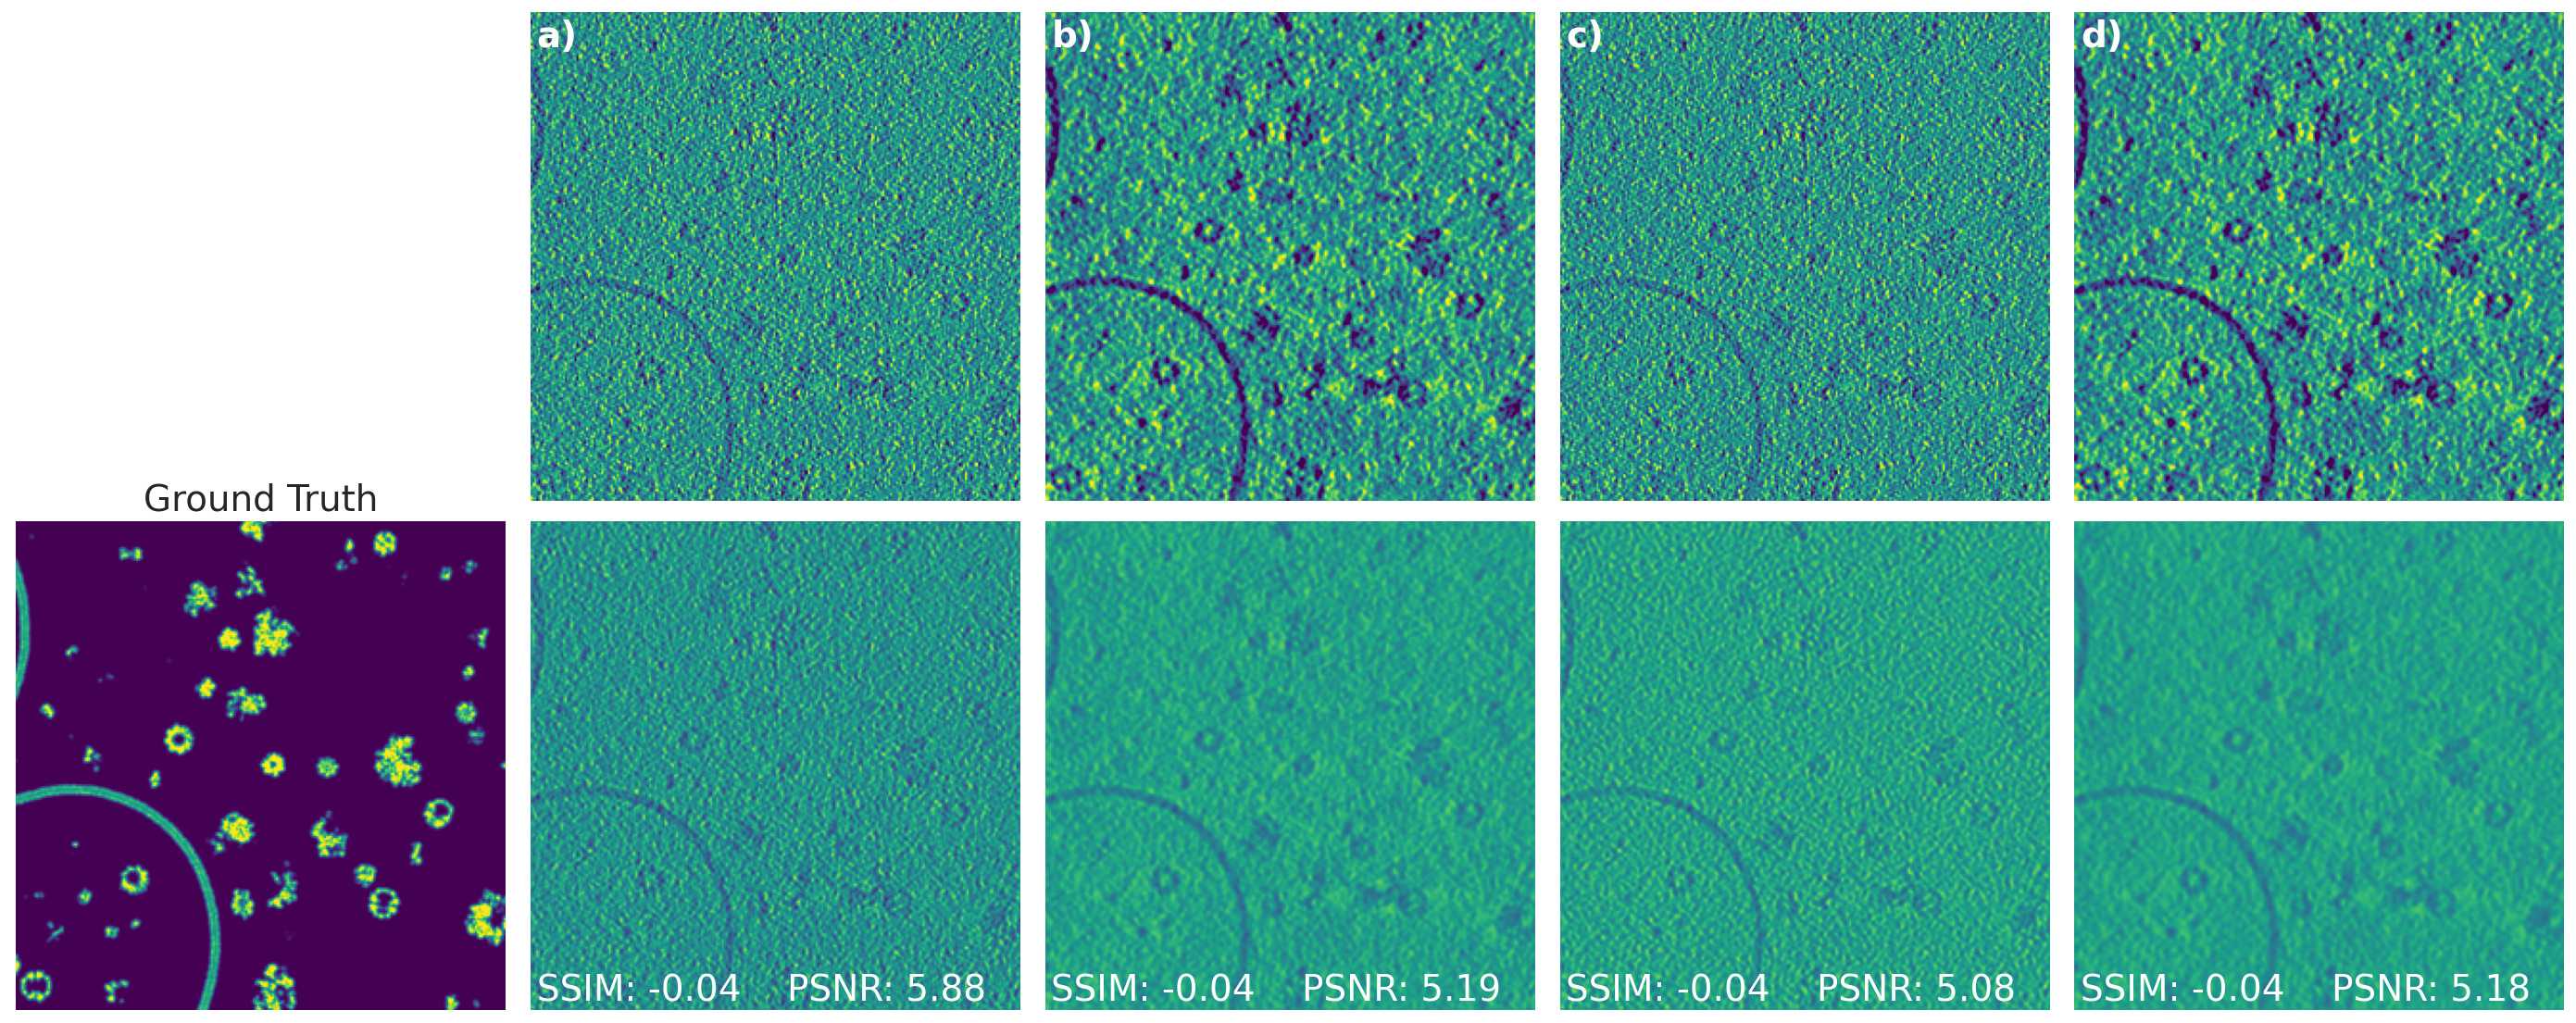

In [4]:
idx = data_log.groupby(['use_deconv_data', 'p'])['full_tomo_ssim'].transform(max) == data_log['full_tomo_ssim']

df = data_log[idx].reset_index()

display(df)

fig, ax = plt.subplots(2, len(df)+1, figsize=(20, 8), dpi=140)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    if row.use_deconv_data=="true":
        noisy = tom_deconv_tomo(**{"vol": noisy, **deconv_kwargs})
    
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[1][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[1][0].set_title('Ground Truth', size=20)
    ax_noisy = ax[0][i+1]
    ax_denoised = ax[1][i+1]
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')

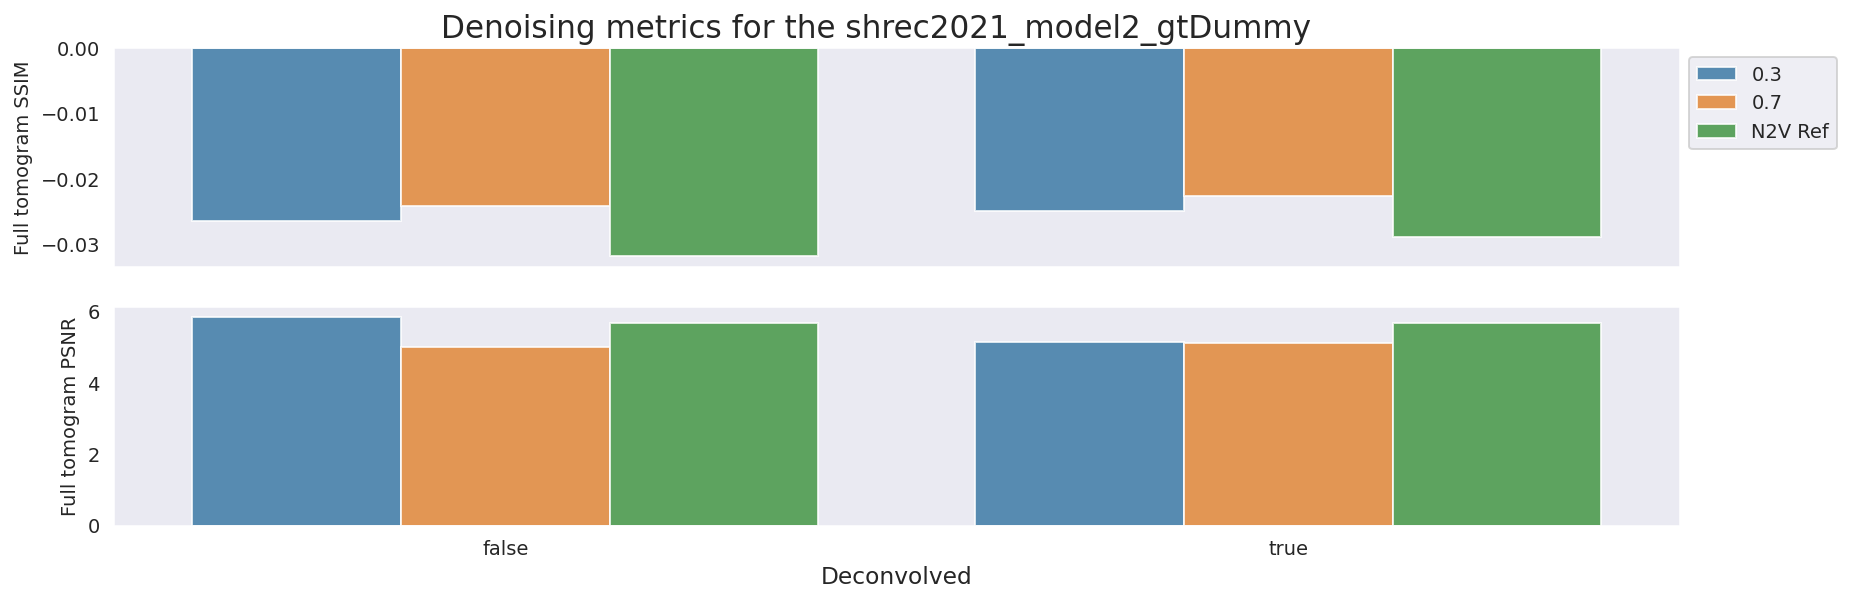

In [5]:
df = data_log.groupby(['use_deconv_data', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['use_deconv_data'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['use_deconv_data', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['use_deconv_data', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, dpi=140)

plt.tight_layout()
name = data_log.gt_tomo_path.unique()[0].split('/')[-1].replace('.mrc', '')

if name == 'tomoPhantom_model14':
    name = '"cell" model'
if name == 'tomoPhantom_model16':
    name = '"spaceship" model'
if name == 'tomoPhantom_model8':
    name = '"blobs" model'
    
plt.suptitle('Denoising metrics for the %s' %name, y=1.01)

sns.barplot(data=df, hue='p', y='full_tomo_ssim', x='use_deconv_data', ax=ax0, alpha=0.8)
ax0.set_xlabel('')
sns.barplot(data=df, hue='p', y='full_tomo_psnr', x='use_deconv_data', ax=ax1, alpha=0.8)
ax1.set_xlabel('Deconvolved')

ax0.set_ylabel('Full tomogram SSIM', fontsize=10)
ax1.set_ylabel('Full tomogram PSNR', fontsize=10)
ax0.legend(bbox_to_anchor=(1, 1))
ax1.get_legend().remove()